# <font color='red'>MÉTODOS ENSEMBLE</font>

## <font color='Blue'>Bagging</font>

Classificador Bagging é um meta-estimador ensemble que faz o fit de classificadores vase, cada um subconjuntos aleat´roios do conjunto de dados original, em seguida, agrega suas previsões individuais (por votação ou por média) para formar uma previsão.

Tal meta-estimador pode tipicamente ser usado como uma maneira de reduzir a variância de um estimador (por exemplo, uma árvore de decisão), introduzindo a randomização em seu procedimento de construção e fazendo um ensemble (conjunto) a partir dele

In [2]:
# Imports
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier # será o estimador base
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale # pre processing colocando na mesma escala
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
# Carregando dados 
digits = load_digits()

In [5]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

<Figure size 640x480 with 0 Axes>

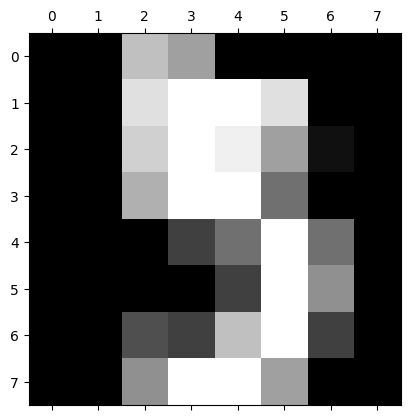

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(digits.images[5])
plt.show()


In [8]:
# Pré processamento
# Coloca os dados na mesma escala
data = scale(digits.data)

In [9]:
# Variaveis preditoras e variavel target
X = data
Y = digits.target

In [14]:
# Construção do Classificador
bagging = BaggingClassifier(KNeighborsClassifier(),
                             max_samples = 0.5, 
                             max_features = 0.5)

In [15]:
bagging

BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5)

In [17]:
bagging.get_params()

# Parametros do KNN

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
?cross_val_score

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : str or callable, default=None

In [24]:
# Score do modelo
scores = cross_val_score(bagging, X, Y)

# Avalia o modelo com dados de treino através de validação cruzada

In [25]:
scores

array([0.925     , 0.91666667, 0.95543175, 0.95264624, 0.9275766 ])

In [26]:
# Média do score
mean = scores.mean()

In [27]:
print(f"Score foi de: {scores}\
      \n\nJá a média do Score foi de: {mean}")

Score foi de: [0.925      0.91666667 0.95543175 0.95264624 0.9275766 ]      

Já a média do Score foi de: 0.935464252553389


<font color='red'>------------------------------------------------------------------------------</font>

# <font color='Blue'>Extremely Randomized Trees (ExtraTrees)</font>

--
Age de igual forma o RandomForest, diferença é que o ExtraTrees randomiza as árvores de decisão

In [28]:
# Imports 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score

In [29]:
digits = load_digits()

In [30]:
# Pré Processamento
data = scale(digits.data)

In [32]:
# Variáveis preditoras e target
X = data
Y = digits.target

Comparando abaixo o Random Forest com ExtraTrees

In [40]:
# Criando o Classificador com uma árvore de decisão
clf_DT = DecisionTreeClassifier(max_depth= None, min_samples_split = 2, random_state=0)
scores_DT = cross_val_score(clf_DT, X, Y)
mean_DT = scores_DT.mean()
print(f"Score Decision Tree : {scores_DT}")
print(f"Score Médio Decision Tree : {mean_DT}")

Score Decision Tree : [0.78055556 0.71388889 0.80779944 0.8356546  0.79665738]
Score Médio Decision Tree : 0.7869111730114515


In [41]:
# Criando o Classificador com Random Forest
clf_RF = RandomForestClassifier(n_estimators= 10, min_samples_split = 2, random_state=0)
scores_RF = cross_val_score(clf_RF, X, Y)
mean_RF = scores_RF.mean()
print(f"Score Random Forest : {scores_RF}")
print(f"Score Random Forest : {mean_RF}")

Score Random Forest : [0.89166667 0.88055556 0.91643454 0.93036212 0.90807799]
Score Random Forest : 0.9054193748065614


In [43]:
# Criando o Classificador com EXTRA TREES
clf_ET = ExtraTreesClassifier(n_estimators= 10, min_samples_split = 2, random_state=0)
scores_ET = cross_val_score(clf_ET, X, Y)
mean_ET = scores_ET.mean()
print(f"Score Random Forest : {scores_ET}")
print(f"Score Random Forest : {mean_ET}")

Score Random Forest : [0.90277778 0.86944444 0.93593315 0.95264624 0.91364903]
Score Random Forest : 0.9148901268956979


<font color='red'>------------------------------------------------------------------------------</font>

# <font color='Blue'>Adaboost (um dos métodos Boosting)</font>

--
Classificador AdaBoost é um meta-estimador, que começa ajustando um classificador no conjunto de dados original e depois ajusta cópias adicionais ao classificador no mesmo conjunto de dados, mas onde os pesos das instâncias classificadas incorretamente sao ajustados para que os classificadores subsequentes se concentram mais em casos dificeis

In [44]:
# Imports 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import fetch_openml 
from sklearn.model_selection import cross_val_score 

In [45]:
# Carregando os dados 
heart = fetch_openml("heart")

In [47]:
heart.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [48]:
heart.target

array([ 1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        1., -1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
        1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.,
        1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,
        1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,
        1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
        1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,
        1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1., -1.,
        1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1., -1

In [49]:
# Filtrando apenas o heart.data e heart.target
X = heart.data
Y = heart.target
Y[Y == -1] = 0 # alterando o valor de -1 para 0

In [56]:
# datasets de treino e teste
X_test, Y_test = X[189:], Y[189:]
X_train, Y_train = X[:189], Y[:189]

In [57]:
# Construindo Estimador base
estim_base = DecisionTreeClassifier(max_depth= 1, min_samples_leaf= 1)

In [58]:
# Construindo a primeira versão do modelo Adaboost
ada_clf_v1 = AdaBoostClassifier(base_estimator= estim_base,
                                learning_rate= 0.1,
                                n_estimators= 400,
                                algorithm= "SAMME")

In [59]:
# Treinando o modelo 
ada_clf_v1.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=400)

In [60]:
ada_clf_v1.get_params()

{'algorithm': 'SAMME',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 1,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(max_depth=1),
 'estimator': None,
 'learning_rate': 0.1,
 'n_estimators': 400,
 'random_state': None}

In [63]:
# Score
scores = cross_val_score(ada_clf_v1, X_test, Y_test)
print(f"Pontuação do ada_clf_v1 => {scores}")

means = scores.mean() # acurácia
print(f"A média da pontuação (ada_clf_v1) é => {means}")


Pontuação do ada_clf_v1 => [0.88235294 0.9375     0.875      0.75       0.6875    ]
A média da pontuação (ada_clf_v1) é => 0.8264705882352942


In [67]:
# Construindo a segunda versão do modelo ADABOOST
ada_clf_v2 = AdaBoostClassifier(base_estimator= estim_base,
                                learning_rate= 0.5,
                                n_estimators= 400,
                                algorithm= "SAMME")

In [68]:
ada_clf_v2.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=400)

In [69]:
# Score V2
scores = cross_val_score(ada_clf_v2, X_test, Y_test)
print(f"Pontuação do ada_clf_v2 => {scores}")

means = scores.mean() # acurácia
print(f"A média da pontuação (ada_clf_v2) é => {means}")

Pontuação do ada_clf_v2 => [0.82352941 0.8125     0.75       0.75       0.75      ]
A média da pontuação (ada_clf_v2) é => 0.7772058823529411
